<a href="https://colab.research.google.com/github/Amritha-S-20/Suicide_rate_analysis_India/blob/main/Suicide_Rate_Analysis_India(2001_2012).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                **India Suicide Rate Analysis(2001-2012)**


*“Suicide doesn’t end the chances of life getting worse, it eliminates the possibility of it ever getting any better.” – Unknown*

This notebook is about suicide rate analysis of India over the period **2001-2012**. The dataset is taken from kaggle. The columns are State, Year,  Type_code, Type, Gender, Age_group and Total.

Importing necessary packages


In [548]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.simplefilter("ignore") #to ignore warning messages

Reading the csv file into dataframe


In [549]:
df=pd.read_csv('/content/drive/MyDrive/Suicide_Rate_Analysis_India(2001-2012)/Suicides in India 2001-2012.csv')
df.head() #displaying first five values in the dataframe

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


#### Data cleaning and Understanding

In [550]:
df.shape

(237519, 7)

From the above dataframe "**total = 0**" means there is no suicide for that particular case, so we can eliminate all those value where "**total = 0**" from our dataframe. 

In [551]:
df = df[df['Total'] != 0]
df.shape #After eliminating unnecessary data

(102038, 7)

In [552]:
df.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')

In [553]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102038 entries, 13 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      102038 non-null  object
 1   Year       102038 non-null  int64 
 2   Type_code  102038 non-null  object
 3   Type       102038 non-null  object
 4   Gender     102038 non-null  object
 5   Age_group  102038 non-null  object
 6   Total      102038 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 6.2+ MB


In [554]:
df.isnull().sum() 

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

There is no null value in our dataframe

In [555]:
df.reset_index(inplace=True)
df

,index,State,Year,Type_code,Type,Gender,Age_group,Total
0,13,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
1,20,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,0-14,1
2,32,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
3,47,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
4,54,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8
...,...,...,...,...,...,...,...,...
102033,237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
102034,237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
102035,237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
102036,237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [556]:
df['State'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Total (All India)', 'Total (States)', 'Total (Uts)', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

Here, Under this state category it is found that we are having the list of all Indian *states* and the *Union territories*. And beside this we have *Total(States), Total(Uts) and Total(All India)*. But the data corresponding to all these values are different so we cannot eliminate any of these. i.e, for all total datas it is only providing the data for Education and Social status. So it will be helpful to analyse overall Education wise and Social status analysis for states, Uts and All India.

In [557]:
df['Type_code'].unique()

array(['Causes', 'Education_Status', 'Means_adopted',
       'Professional_Profile', 'Social_Status'], dtype=object)

The column **Type** is entirely based on the column **Type_code**. So for the ease of the analysis we can sub divide the data frame according to our **Type_code**

In [558]:
reasons_set = df[df['Type_code'] == 'Causes']
reasons_set['Type'].value_counts()

Causes Not known                                  3332
Other Causes (Please Specity)                     3065
Family Problems                                   3013
Other Prolonged Illness                           2680
Insanity/Mental Illness                           2572
Love Affairs                                      1697
Poverty                                           1568
Death of Dear Person                              1511
Fall in Social Reputation                         1496
Suspected/Illicit Relation                        1420
Drug Abuse/Addiction                              1406
Unemployment                                      1404
Property Dispute                                  1393
Failure in Examination                            1379
Bankruptcy or Sudden change in Economic           1373
Cancer                                            1233
Professional/Career Problem                       1160
Cancellation/Non-Settlement of Marriage           1116
Paralysis 

here certain type seems to be same so we need to combine them

In [559]:
reasons_set['Type'] = reasons_set['Type'].replace('Bankruptcy or Sudden change in Economic Status','Bankruptcy or Sudden change in Economic')
reasons_set['Type'] = reasons_set['Type'].replace('Not having Children (Barrenness/Impotency','Not having Children(Barrenness/Impotency')
reasons_set['Type'] = reasons_set['Type'].replace('Other Causes (Please Specity)','Causes Not known')


In [560]:
reasons_set['Type'].value_counts()

Causes Not known                            6397
Family Problems                             3013
Other Prolonged Illness                     2680
Insanity/Mental Illness                     2572
Love Affairs                                1697
Poverty                                     1568
Death of Dear Person                        1511
Bankruptcy or Sudden change in Economic     1499
Fall in Social Reputation                   1496
Suspected/Illicit Relation                  1420
Drug Abuse/Addiction                        1406
Unemployment                                1404
Property Dispute                            1393
Failure in Examination                      1379
Cancer                                      1233
Professional/Career Problem                 1160
Not having Children(Barrenness/Impotency    1131
Cancellation/Non-Settlement of Marriage     1116
Paralysis                                   1105
Illness (Aids/STD)                          1011
Dowry Dispute       

In [561]:
reasons_set=reasons_set.reset_index()
reasons_set

,level_0,index,State,Year,Type_code,Type,Gender,Age_group,Total
0,0,13,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
1,1,20,A & N Islands,2001,Causes,Causes Not known,Female,0-14,1
2,2,32,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
3,3,47,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
4,4,54,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8
...,...,...,...,...,...,...,...,...,...
39526,101640,236650,West Bengal,2011,Causes,Other Prolonged Illness,Male,60+,41
39527,101641,236651,West Bengal,2011,Causes,Fall in Social Reputation,Male,60+,3
39528,101642,236652,West Bengal,2011,Causes,Insanity/Mental Illness,Male,60+,35
39529,101643,236653,West Bengal,2011,Causes,Causes Not known,Male,60+,136


In [562]:
Education = df[df['Type_code'] == 'Education_Status']
Education['Type'].value_counts()
Education=Education[Education['State']!='Total (All India)']
Education=Education[Education['State']!= 'Total (States)'] 
Education=Education[Education['State']!= 'Total (Uts)']

In [563]:
Education.reset_index(inplace=True)
Education

,level_0,index,State,Year,Type_code,Type,Gender,Age_group,Total
0,42,261,A & N Islands,2001,Education_Status,No Education,Female,0-100+,4
1,43,263,A & N Islands,2001,Education_Status,Middle,Female,0-100+,33
2,44,266,A & N Islands,2001,Education_Status,Primary,Female,0-100+,7
3,45,267,A & N Islands,2001,Education_Status,Matriculate/Secondary,Female,0-100+,6
4,46,268,A & N Islands,2001,Education_Status,Matriculate/Secondary,Male,0-100+,10
...,...,...,...,...,...,...,...,...,...
5597,101899,237234,West Bengal,2012,Education_Status,Primary,Male,0-100+,2983
5598,101900,237235,West Bengal,2012,Education_Status,No Education,Male,0-100+,1096
5599,101901,237236,West Bengal,2012,Education_Status,Middle,Male,0-100+,2467
5600,101902,237237,West Bengal,2012,Education_Status,Graduate,Male,0-100+,242


 The Education wise data is not provided base on age group.. Only the overall data is provided So we can drop the age from the education if we want

In [564]:
methodadopted = df[df['Type_code'] == 'Means_adopted']
methodadopted['Type'].value_counts()

By Hanging                                 3514
By Consuming Other Poison                  2952
By Drowning                                2609
By Consuming Insecticides                  2608
By Fire/Self Immolation                    2582
By Other means (please specify)            2415
By coming under running vehicles/trains    1782
By touching electric wires                 1483
By Jumping from (Other sites)              1384
By Jumping from (Building)                 1325
By Overdose of sleeping pills              1272
By Fire-Arms                               1236
By Over Alcoholism                         1228
By Jumping off Moving Vehicles/Trains      1137
By Self Infliction of injury               1093
By Machine                                  504
By Other means                              213
Name: Type, dtype: int64

In [565]:
methodadopted['Type'] = methodadopted['Type'].replace('By Other means (please specify)','By Other means') #combining the redundant values as in causes
methodadopted['Type'].value_counts()

By Hanging                                 3514
By Consuming Other Poison                  2952
By Other means                             2628
By Drowning                                2609
By Consuming Insecticides                  2608
By Fire/Self Immolation                    2582
By coming under running vehicles/trains    1782
By touching electric wires                 1483
By Jumping from (Other sites)              1384
By Jumping from (Building)                 1325
By Overdose of sleeping pills              1272
By Fire-Arms                               1236
By Over Alcoholism                         1228
By Jumping off Moving Vehicles/Trains      1137
By Self Infliction of injury               1093
By Machine                                  504
Name: Type, dtype: int64

In [566]:
methodadopted=methodadopted.reset_index()
methodadopted

,level_0,index,State,Year,Type_code,Type,Gender,Age_group,Total
0,52,277,A & N Islands,2001,Means_adopted,By Hanging,Female,0-14,2
1,53,307,A & N Islands,2001,Means_adopted,By Hanging,Male,0-14,2
2,54,312,A & N Islands,2001,Means_adopted,By Fire/Self Immolation,Female,15-29,2
3,55,315,A & N Islands,2001,Means_adopted,By Consuming Other Poison,Female,15-29,9
4,56,316,A & N Islands,2001,Means_adopted,By Hanging,Female,15-29,20
...,...,...,...,...,...,...,...,...,...
29332,102023,237393,West Bengal,2012,Means_adopted,By Jumping off Moving Vehicles/Trains,Male,60+,7
29333,102024,237394,West Bengal,2012,Means_adopted,By Consuming Insecticides,Male,60+,53
29334,102025,237395,West Bengal,2012,Means_adopted,By Other means,Male,60+,241
29335,102026,237396,West Bengal,2012,Means_adopted,By Consuming Other Poison,Male,60+,99


In [567]:
profession = df[df['Type_code'] == 'Professional_Profile']
profession = profession[(profession['Age_group']!='0-14') | (profession['Type']!= 'Retired Person')] 
#in our orginal data frame there were 9 retired person belonging to 0-14 agegroup that might be error hence deleting those data
profession['Type'].value_counts()

Others (Please Specify)              5509
Unemployed                           2424
Farming/Agriculture Activity         2310
Service (Private)                    2230
Student                              1854
Self-employed (Business activity)    1793
Service (Government)                 1771
House Wife                           1543
Professional Activity                1513
Public Sector Undertaking            1506
Retired Person                        833
Name: Type, dtype: int64

In [568]:
profession.reset_index(inplace=True)
profession

,level_0,index,State,Year,Type_code,Type,Gender,Age_group,Total
0,72,443,A & N Islands,2001,Professional_Profile,Student,Female,0-14,2
1,73,448,A & N Islands,2001,Professional_Profile,Student,Male,0-14,1
2,74,456,A & N Islands,2001,Professional_Profile,Others (Please Specify),Male,0-14,1
3,75,461,A & N Islands,2001,Professional_Profile,House Wife,Female,15-29,21
4,76,468,A & N Islands,2001,Professional_Profile,Others (Please Specify),Female,15-29,1
...,...,...,...,...,...,...,...,...,...
23281,101873,236948,West Bengal,2011,Professional_Profile,Others (Please Specify),Male,60+,354
23282,101874,236949,West Bengal,2011,Professional_Profile,Self-employed (Business activity),Male,60+,32
23283,101875,236950,West Bengal,2011,Professional_Profile,Service (Private),Male,60+,1
23284,101876,236951,West Bengal,2011,Professional_Profile,Others (Please Specify),Male,60+,195


In [569]:
maritalstatus = df[df['Type_code'] == 'Social_Status']
maritalstatus['Type'].value_counts()
maritalstatus  #the marital status is also provided for the total age group, not for seperate age group
maritalstatus=maritalstatus[maritalstatus['State']!='Total (All India)']
maritalstatus=maritalstatus[maritalstatus['State']!= 'Total (States)'] 
maritalstatus=maritalstatus[maritalstatus['State']!= 'Total (Uts)']

In [570]:
maritalstatus=maritalstatus.reset_index()

In [571]:
df['Age_group'].unique()

array(['0-14', '15-29', '30-44', '45-59', '60+', '0-100+'], dtype=object)

Here the **0-100+** age group is for representing the Education wise and social status representation. 

In [572]:
byyear = pd.DataFrame(reasons_set.groupby('Year')['Total'].sum())
byyear = byyear.reset_index()
byyear

,Year,Total
0,2001,108506
1,2002,110417
2,2003,110851
3,2004,113697
4,2005,113914
5,2006,118112
6,2007,122637
7,2008,125017
8,2009,127151
9,2010,134599


In [573]:
byyear.sum()

Year       24078
Total    1440974
dtype: int64

In [574]:
byyear2 = pd.DataFrame(methodadopted.groupby('Year')['Total'].sum())
byyear2 = byyear2.reset_index()
byyear2

,Year,Total
0,2001,108506
1,2002,110417
2,2003,110851
3,2004,113697
4,2005,113914
5,2006,118112
6,2007,122637
7,2008,125017
8,2009,127151
9,2010,134599


In [575]:
byyear2.sum()

Year       24078
Total    1455931
dtype: int64

In [576]:
bygen3 = pd.DataFrame(profession.groupby('Gender')['Total'].sum())
bygen3 = bygen3.reset_index()
bygen3

,Gender,Total
0,Female,517140
1,Male,922094


In [577]:
bygen3.sum()

Gender    FemaleMale
Total        1439234
dtype: object

Since the total counts of suicides based on our differnt parameters are approximately equal we can work with any of these data frame but since **methodadopted** is having the highest total count lets take that dataframe for analysing the total suicides based on gender, year agegroup and states


Now we have cleaned all the data we want. 

## Data visualization and analysis

**1.How the year and Total Suicide count related?**

In [578]:
byyear2 = pd.DataFrame(methodadopted.groupby('Year')['Total'].sum())
byyear2 = byyear2.reset_index()
byyear2


,Year,Total
0,2001,108506
1,2002,110417
2,2003,110851
3,2004,113697
4,2005,113914
5,2006,118112
6,2007,122637
7,2008,125017
8,2009,127151
9,2010,134599


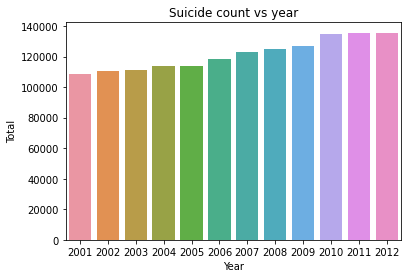

In [579]:
sns.barplot(x='Year', y='Total', data=byyear2).set(title='Suicide count vs year')
plt.savefig('suicideyear')

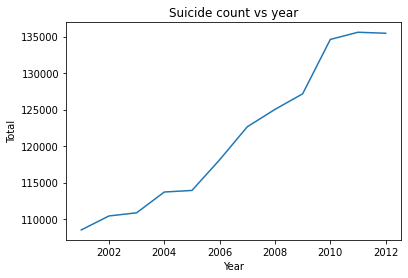

In [580]:
sns.lineplot(x = 'Year', y = 'Total',data=byyear2).set(title='Suicide count vs year')
plt.savefig('suicideyearlineplot')

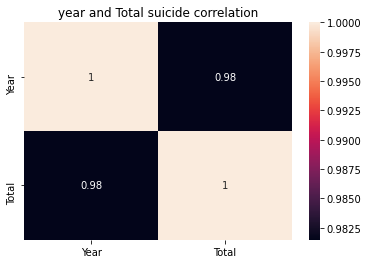

In [581]:
sns.heatmap(byyear2.corr(),annot=True).set(title='year and Total suicide correlation')
plt.savefig('coryearandtotal')

From this above plots it is shown that the no. of suicide increases as the year increase. The corelation is also strictly positive ie, 0.98 very close to 1.
The highest suicide is in the year 2011. 

**2.which Gender is showing higher suicide tendency? Is there any difference in this pattern as the year changes?**

In [582]:
bygen = pd.DataFrame(methodadopted.groupby('Gender')['Total'].sum())
bygen = bygen.reset_index()
bygen

,Gender,Total
0,Female,524013
1,Male,931918


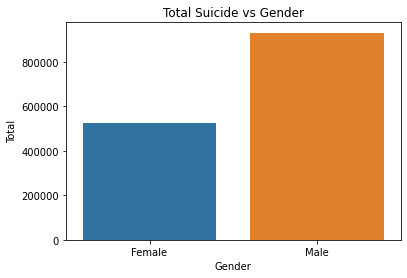

In [583]:
sns.barplot(x='Gender', y='Total', data=bygen).set(title='Total Suicide vs Gender')
plt.savefig('Gendertotal')

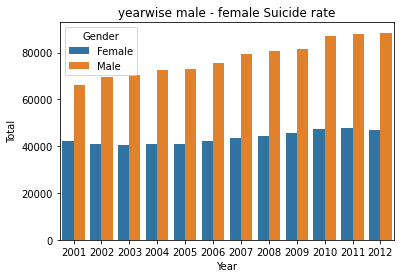

In [584]:
gender_wise = methodadopted[['Year', 'Gender','Total']].groupby(['Year', 'Gender']).sum()
gender_wise.reset_index(inplace = True)
sns.barplot(x ='Year', y ='Total', hue = 'Gender', data = gender_wise).set(title='yearwise male - female Suicide rate')
plt.savefig('Gtotalyearwise')

from the above two barplot it is evident that male are having high tendency of suicide based on different problem, not only for overall data it is also true for every year.

**3. Which State or union territory have higher suicide rate? and also having lower suicide rate?**

In [585]:
bystate = pd.DataFrame(methodadopted.groupby('State')['Total'].sum())  
bystate = bystate.sort_values('Total',ascending=False).reset_index()  # Grouping by State
bystate

,State,Total
0,Maharashtra,180389
1,West Bengal,175987
2,Tamil Nadu,163813
3,Andhra Pradesh,162820
4,Karnataka,146965
5,Kerala,107936
6,Madhya Pradesh,90307
7,Gujarat,66177
8,Chhattisgarh,60495
9,Odisha,53448


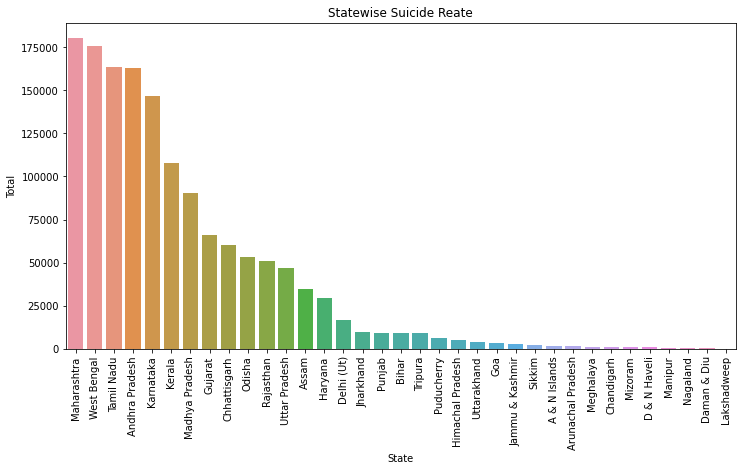

In [586]:
plt.figure(figsize=(12,6))
sns.barplot(x='State', y='Total', data=bystate).set(title='Statewise Suicide Reate')
plt.xticks(rotation=90)
plt.savefig('statesuicide')

Maharashtra is having highest suicide count and also Lakshadweep with low suicide count among all Indian States and UTs

**4. Major reasons for suicide in the State Maharashtra(whwre there is higher suicide rate)**

In [587]:
Maharashtra = reasons_set[reasons_set['State']=='Maharashtra']
Maharashtra = pd.DataFrame(Maharashtra.groupby('Type')['Total'].sum())  
Maharashtra = Maharashtra.sort_values('Total',ascending=False).reset_index()  # Grouping by State
Maharashtra

,Type,Total
0,Family Problems,65341
1,Other Prolonged Illness,33808
2,Insanity/Mental Illness,14859
3,Causes Not known,13225
4,Drug Abuse/Addiction,12671
5,Bankruptcy or Sudden change in Economic,7099
6,Unemployment,4493
7,Poverty,4083
8,Dowry Dispute,3391
9,Failure in Examination,3284


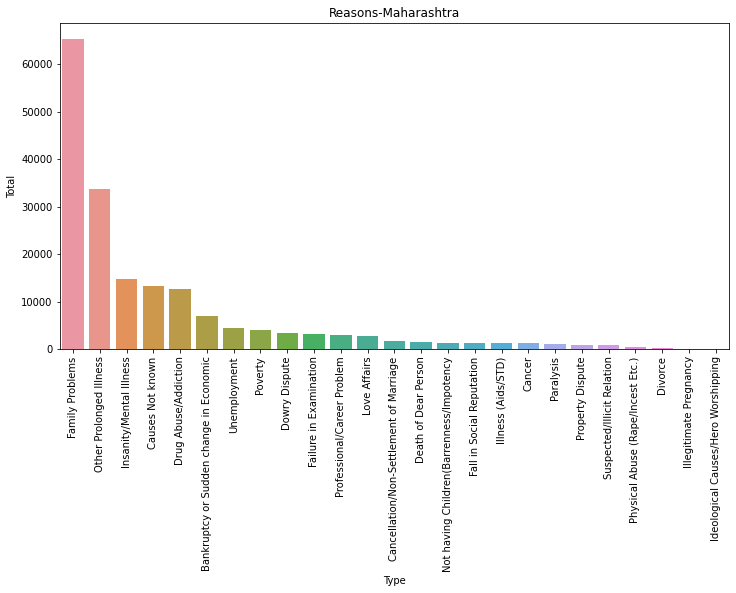

In [588]:
plt.figure(figsize=(12,6))
sns.barplot(x='Type', y='Total', data=Maharashtra).set(title='Reasons-Maharashtra')
plt.xticks(rotation=90)
plt.savefig('reasonsuicidemaha')

The major reason for suicide in Maharashtra is Family problem which is similiar to overall trend. Drug abuse, Dowry problem and failure of examination is one of the top ten reasons of suicide in Maharashtra which is definitely should be considered and have to find remedies to rectify.

**5. Which age group is showing higher suicide tendency in maharashtra**

In [589]:
Maharashtra = reasons_set[reasons_set['State']=='Maharashtra']
Maharashtra = pd.DataFrame(Maharashtra.groupby(['Age_group','Gender'])['Total'].sum()) 
Maharashtra

Total
Age_group Gender       
0-14      Female   1053
          Male      864
15-29     Female  31113
          Male    37177
30-44     Female  16532
          Male    45747
45-59     Female   6434
          Male    26728
60+       Female   3503
          Male    11238

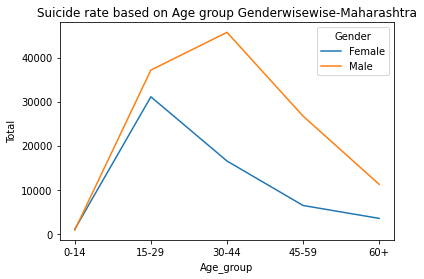

In [590]:
sns.lineplot(x='Age_group', y='Total' ,data=Maharashtra, hue = 'Gender').set(title='Suicide rate based on Age group Genderwisewise-Maharashtra')
plt.savefig('Gwisemaha')

For almost all age groups male are having higher suicide tendecy except the age group 0-14.


*   Out of total Female suicides the higher suicide rate belongs to the age group 15-29
*   Out of total male suicides the higher suicide rate belongs to the age group 30-40 



**6. Age wise suicide rate based on gender**

In [591]:
byagegroup = pd.DataFrame(methodadopted[['Age_group','Gender','Total']].groupby(['Age_group','Gender']).sum())  
byagegroup = byagegroup.reset_index()
byagegroup


,Age_group,Gender,Total
0,0-14,Female,16621
1,0-14,Male,16488
2,15-29,Female,235305
3,15-29,Male,279313
4,30-44,Female,160721
5,30-44,Male,333537
6,45-59,Female,78288
7,45-59,Male,219140
8,60+,Female,33078
9,60+,Male,83440


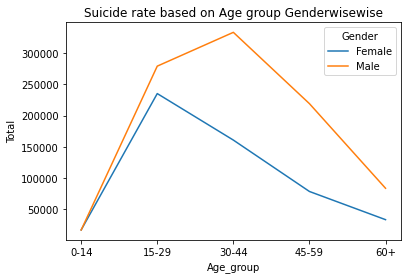

In [592]:
sns.lineplot(x='Age_group', y='Total' ,data=byagegroup, hue = 'Gender').set(title='Suicide rate based on Age group Genderwisewise')
plt.savefig('Gensuicide')

The trend is similiar to which we have found in Maharashtra

*   Almost all age group except 0-14 male suicide rate is higher
*   Out of total female suicides, the highest suicide rate comes under the age group 15-29

*   Out of total male suicides, the highest suicide rate comes under the age group 30-40












**6.The percentage of each reasons out of total Suicide. Does this have any change when it comes to change in Gender or is it showing same trend?**

In [593]:
reasonavg = reasons_set.groupby('Type')['Total'].sum().reset_index()
reasonavg = reasonavg.sort_values('Total',ascending=False).reset_index() 
reasonavg

,index,Type,Total
0,3,Causes Not known,453119
1,10,Family Problems,341952
2,17,Other Prolonged Illness,194565
3,14,Insanity/Mental Illness,94229
4,15,Love Affairs,45039
5,0,Bankruptcy or Sudden change in Economic,35410
6,20,Poverty,32684
7,6,Dowry Dispute,31970
8,7,Drug Abuse/Addiction,30046
9,24,Unemployment,27365


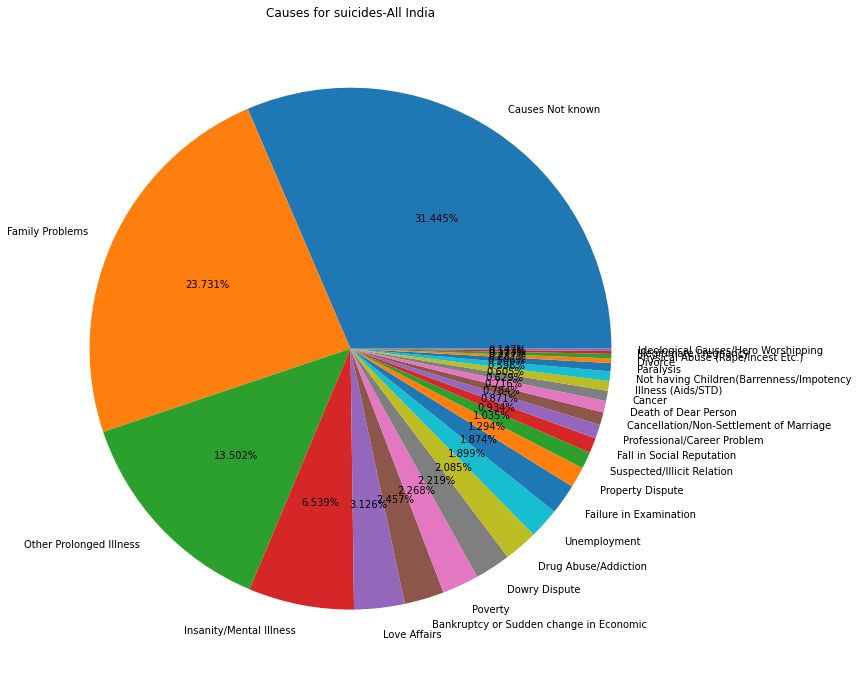

<Figure size 432x288 with 0 Axes>

In [594]:
plt.figure(figsize=(15,12))
plt.pie(reasonavg.Total,labels=reasonavg.Type,autopct='%1.3f%%')
plt.title("Causes for suicides-All India")
plt.show()
plt.savefig('causeindia')

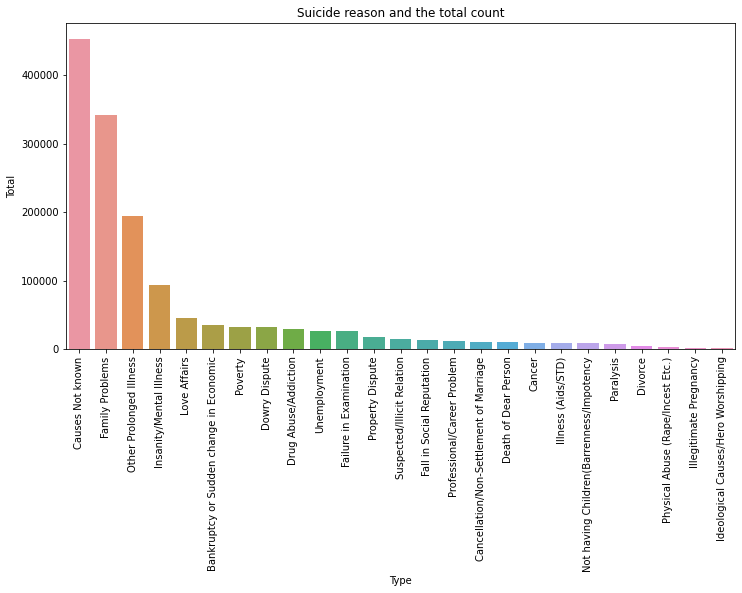

In [595]:
plt.figure(figsize=(12,6))
sns.barplot(x='Type', y='Total', data=reasonavg).set(title='Suicide reason and the total count')
plt.xticks(rotation=90)
plt.savefig('causecountindia')



*   The major reason for total suicide is family problem
*   The top 5 known reasonns include family problems, other prolonged illness, mental illness, love affairs and bankruptancy



In [596]:
reasonmale = reasons_set[reasons_set['Gender']== 'Male']
reasonmale = reasonmale.groupby('Type')['Total'].sum().reset_index()
#reasonmale = reasonmale.sort_values('Total',ascending=False).reset_index()
reasonmale

,Type,Total
0,Bankruptcy or Sudden change in Economic,31175
1,Cancellation/Non-Settlement of Marriage,5170
2,Cancer,6180
3,Causes Not known,304985
4,Death of Dear Person,5614
5,Divorce,1598
6,Dowry Dispute,764
7,Drug Abuse/Addiction,28841
8,Failure in Examination,14951
9,Fall in Social Reputation,8767


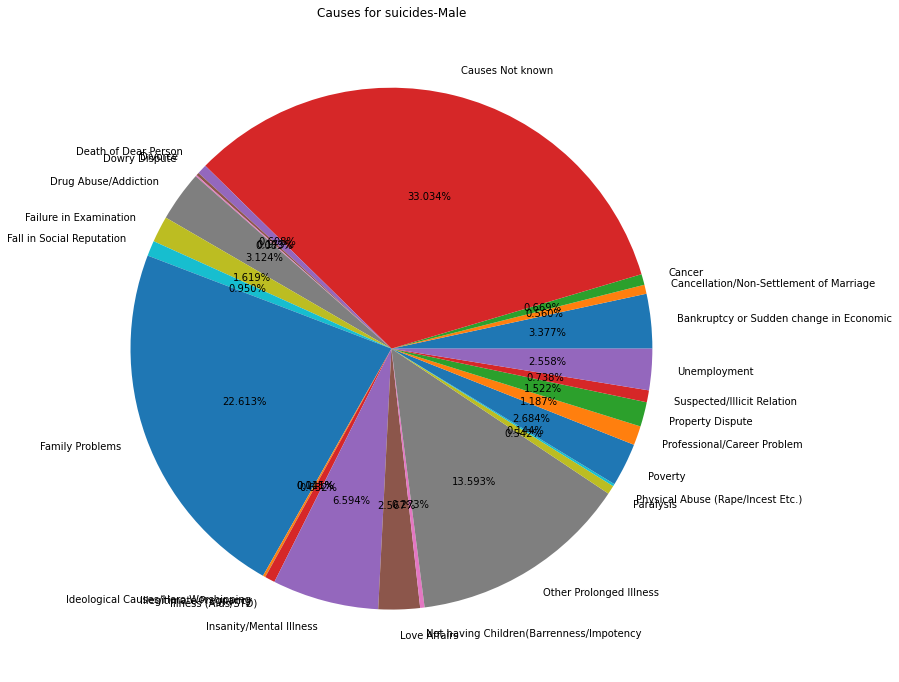

<Figure size 432x288 with 0 Axes>

In [597]:
plt.figure(figsize=(15,12))
plt.pie(reasonmale.Total,labels=reasonmale.Type,autopct='%1.3f%%')
plt.title("Causes for suicides-Male")
plt.show()
plt.savefig('causesmale')

The major reason for male suicide is also familiar to that of total suicide

top known five reasons are
*   Family problems
*   Other prolonged illness

*   Mental illness
*   bankruptcy 

*   poverty







In [598]:
reasonfemale = reasons_set[reasons_set['Gender']== 'Female']
reasonfemale = reasonfemale.groupby('Type')['Total'].sum().reset_index()
reasonfemale

,Type,Total
0,Bankruptcy or Sudden change in Economic,4235
1,Cancellation/Non-Settlement of Marriage,6126
2,Cancer,2878
3,Causes Not known,148134
4,Death of Dear Person,4707
5,Divorce,2535
6,Dowry Dispute,31206
7,Drug Abuse/Addiction,1205
8,Failure in Examination,12054
9,Fall in Social Reputation,4697


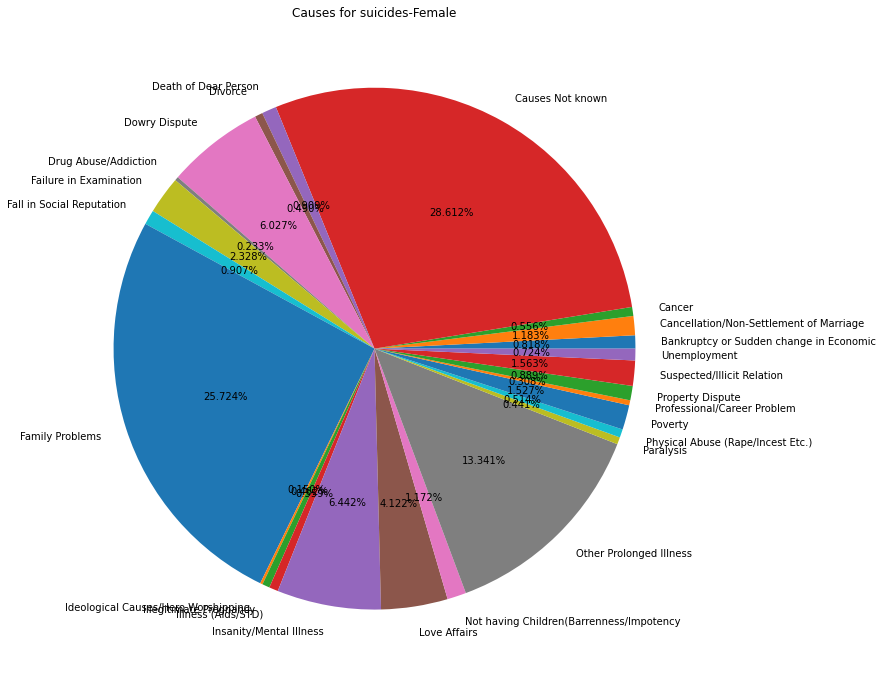

<Figure size 432x288 with 0 Axes>

In [599]:
plt.figure(figsize=(15,12))
plt.pie(reasonfemale.Total,labels=reasonfemale.Type,autopct='%1.3f%%')
plt.title("Causes for suicides-Female")
plt.show()
plt.savefig('causesfemale')

The top five reasons of female suicides are


*   family problems
*   prolonged illness

*   mental illness
*   dowry issues

*   love affairs


> There is a large amount of suicides occured due to the dowry problems for females and also unemployment for males, drug addiction is also an important factor of suicide for male individuals





**7. Different methods(percentage) opted for overall suicide**

In [600]:
methodsopted = methodadopted.groupby('Type')['Total'].sum().reset_index()
methodsopted = methodsopted.sort_values('Total',ascending=False).reset_index() 
methodsopted

,index,Type,Total
0,5,By Hanging,460955
1,0,By Consuming Insecticides,275501
2,1,By Consuming Other Poison,231178
3,10,By Other means,144370
4,4,By Fire/Self Immolation,128006
5,2,By Drowning,96711
6,14,By coming under running vehicles/trains,45299
7,11,By Over Alcoholism,15973
8,15,By touching electric wires,10816
9,12,By Overdose of sleeping pills,9960


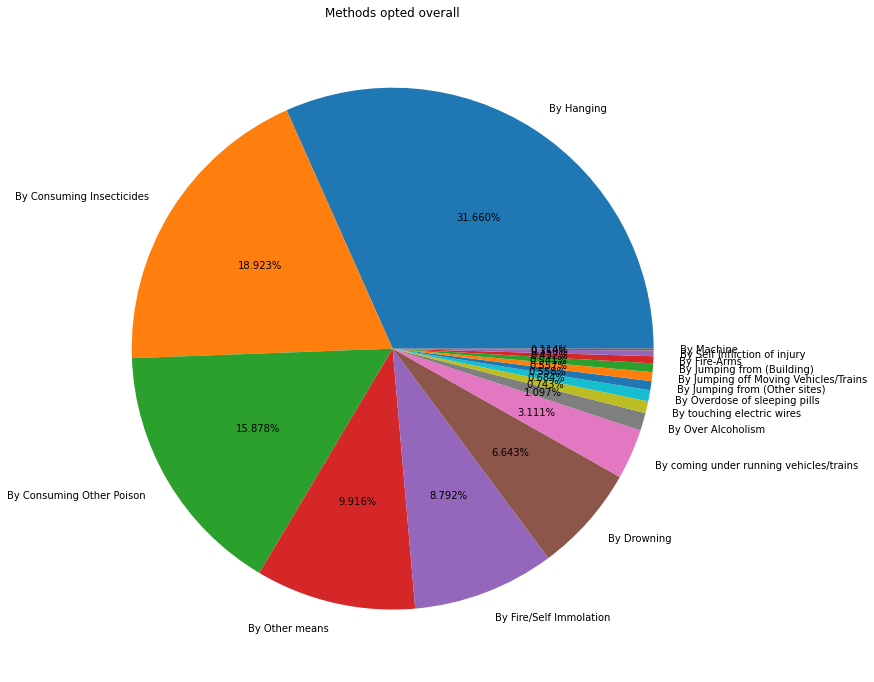

<Figure size 432x288 with 0 Axes>

In [601]:
plt.figure(figsize=(15,12))
plt.pie(methodsopted.Total,labels=methodsopted.Type,autopct='%1.3f%%')
plt.title("Methods opted overall")
plt.show()
plt.savefig('methodopted')

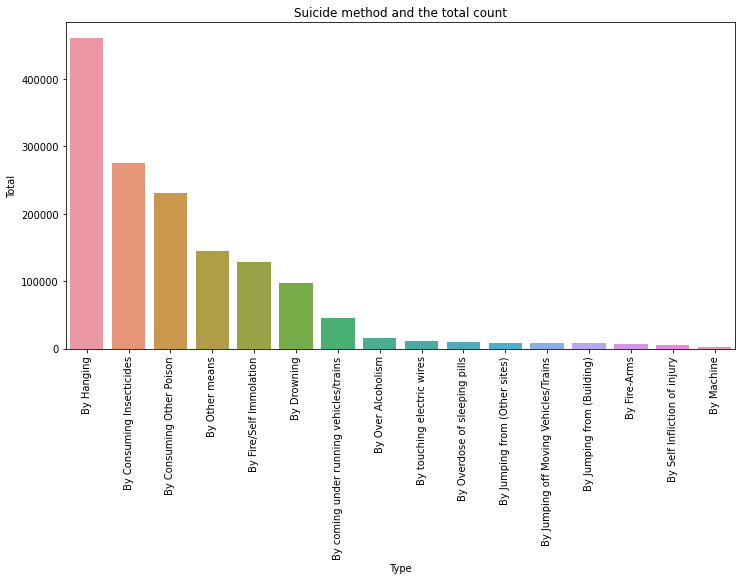

In [602]:
plt.figure(figsize=(12,6))
sns.barplot(x='Type', y='Total', data=methodsopted).set(title='Suicide method and the total count')
plt.xticks(rotation=90)
plt.savefig('methodcount')

The method opted by most of the people to commit suicide is by hanging.
The top 5 methods are


*   By hanging
*   By consuming insecticides


*   By consuming other Poison
*   By fire


*   By drowning








**8. Qualification And the Total Suicide rate**

In [603]:
Qualification = Education.groupby('Type')['Total'].sum().reset_index()
Qualification

,Type,Total
0,Diploma,14153
1,Graduate,31274
2,Hr. Secondary/Intermediate/Pre-Universit,118908
3,Matriculate/Secondary,256566
4,Middle,342971
5,No Education,321757
6,Post Graduate and Above,7475
7,Primary,362827


In [604]:
Qualificationmale = Education[Education['Gender']=='Male']
Qualificationmale = Qualificationmale.groupby('Type')['Total'].sum().reset_index()
Qualificationmale

,Type,Total
0,Diploma,10419
1,Graduate,21590
2,Hr. Secondary/Intermediate/Pre-Universit,79502
3,Matriculate/Secondary,174626
4,Middle,225208
5,No Education,188815
6,Post Graduate and Above,5271
7,Primary,226487


In [605]:
Qualificationfemale = Education[Education['Gender']=='Female']
Qualificationfemale = Qualificationfemale.groupby('Type')['Total'].sum().reset_index()
Qualificationfemale

,Type,Total
0,Diploma,3734
1,Graduate,9684
2,Hr. Secondary/Intermediate/Pre-Universit,39406
3,Matriculate/Secondary,81940
4,Middle,117763
5,No Education,132942
6,Post Graduate and Above,2204
7,Primary,136340


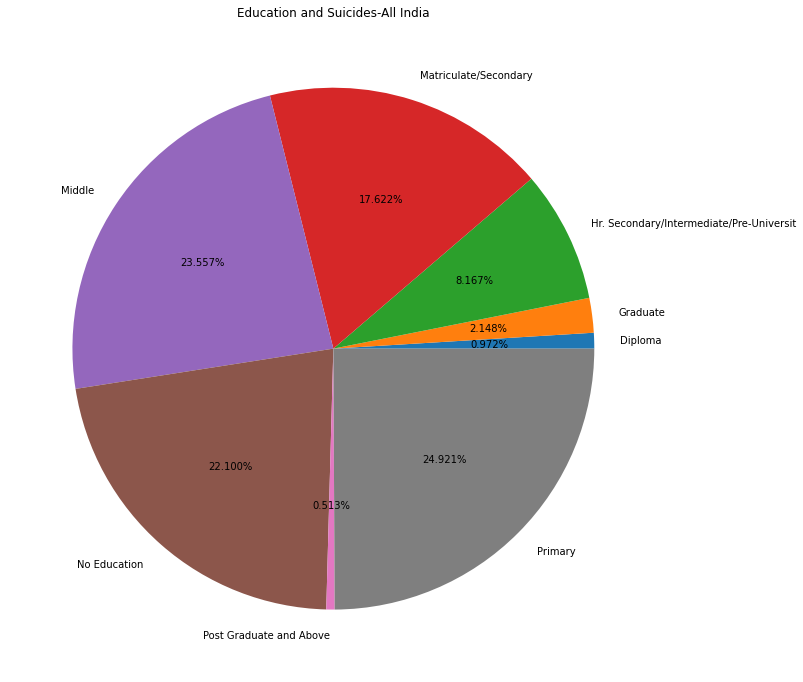

<Figure size 432x288 with 0 Axes>

In [606]:
plt.figure(figsize=(15,12))
plt.pie(Qualification.Total,labels=Qualification.Type,autopct='%1.3f%%')
plt.title("Education and Suicides-All India")
plt.show()
plt.savefig('eduindia')

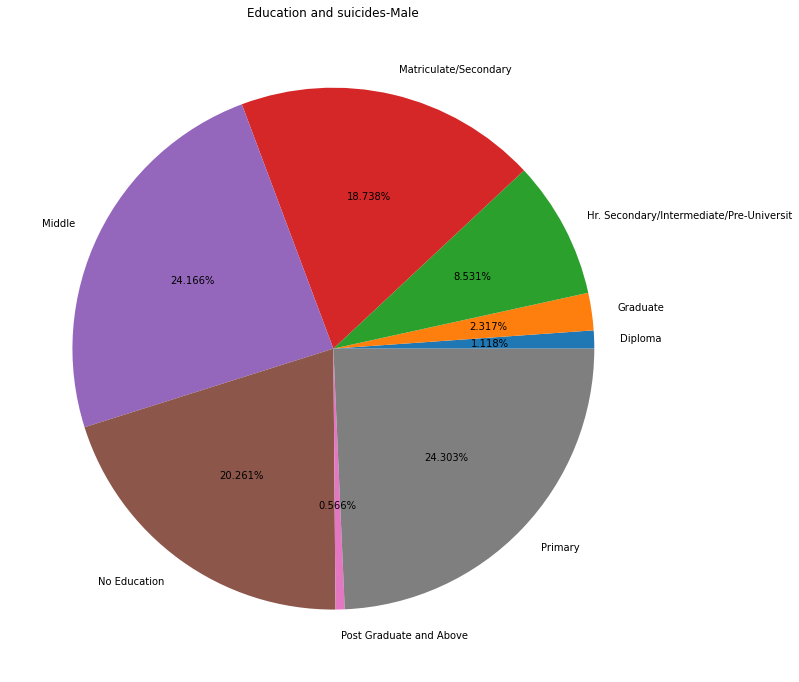

<Figure size 432x288 with 0 Axes>

In [607]:
plt.figure(figsize=(15,12))
plt.pie(Qualificationmale.Total,labels=Qualificationmale.Type,autopct='%1.3f%%')
plt.title("Education and suicides-Male")
plt.show()
plt.savefig('edumale')

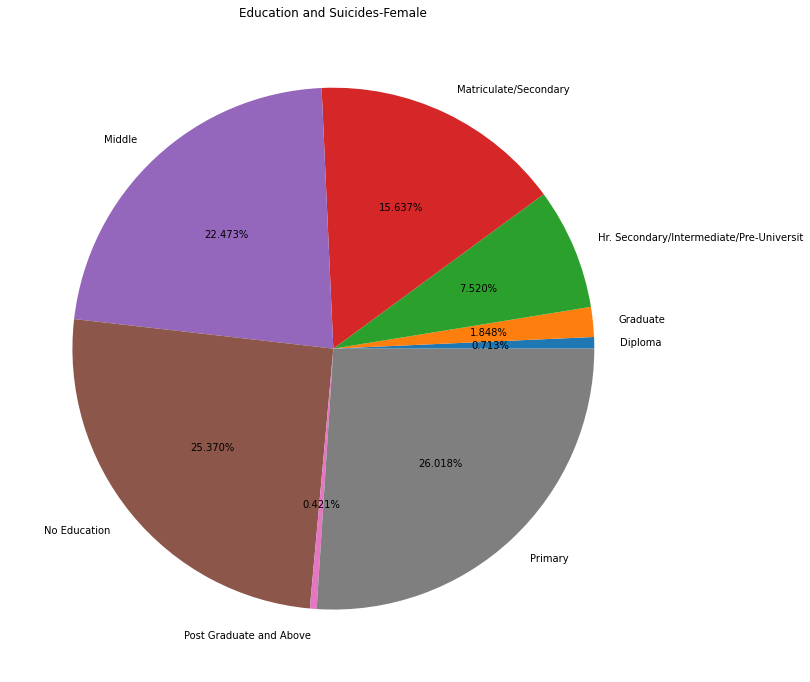

<Figure size 432x288 with 0 Axes>

In [608]:
plt.figure(figsize=(15,12))
plt.pie(Qualificationfemale.Total,labels=Qualificationfemale.Type,autopct='%1.3f%%')
plt.title("Education and Suicides-Female")
plt.show()
plt.savefig('edufemale')

From all the pie charts representing education - suicide rate for overall India , for male and female. It is evident that good education can decrease the suicidal tendency. As the educational qualification of an individual increases the suicidal rate also decreases.

**9. Suicide rate by professional background**

In [609]:
Profession_backgroud = profession.groupby('Type')['Total'].sum().reset_index()
Profession_backgroud

,Type,Total
0,Farming/Agriculture Activity,197923
1,House Wife,285243
2,Others (Please Specify),469147
3,Professional Activity,39204
4,Public Sector Undertaking,30786
5,Retired Person,11325
6,Self-employed (Business activity),78112
7,Service (Government),23325
8,Service (Private),115472
9,Student,74323


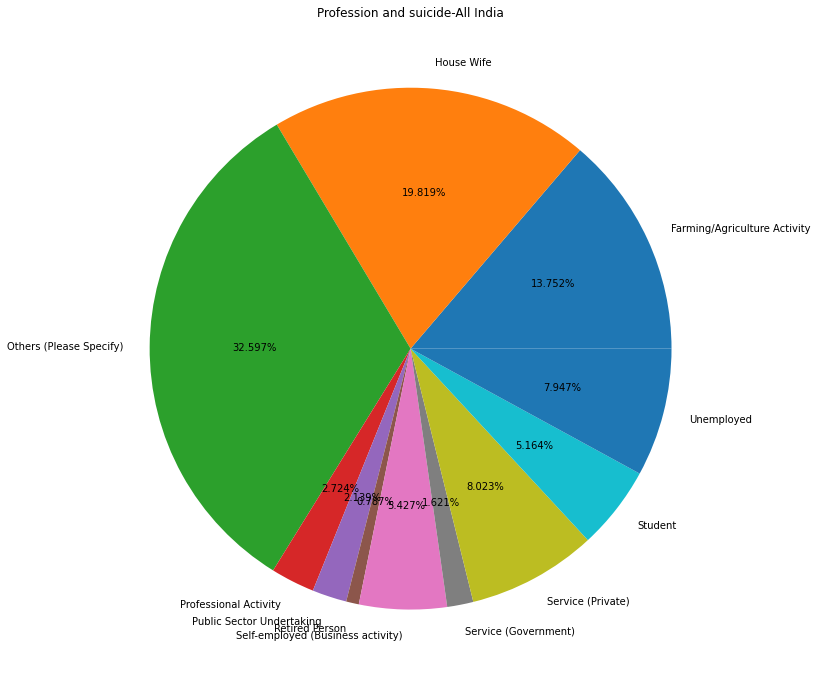

<Figure size 432x288 with 0 Axes>

In [610]:
plt.figure(figsize=(15,12))
plt.pie(Profession_backgroud.Total,labels=Profession_backgroud.Type,autopct='%1.3f%%')
plt.title("Profession and suicide-All India")
plt.show()
plt.savefig('profindia')

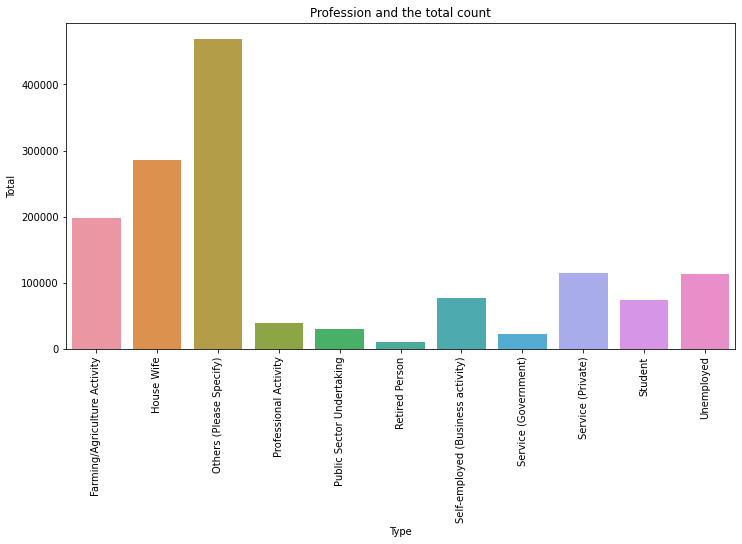

In [611]:
plt.figure(figsize=(12,6))
sns.barplot(x='Type', y='Total', data=Profession_backgroud).set(title='Profession and the total count')
plt.xticks(rotation=90)
plt.savefig('proftoa')

In [612]:
Profession_male = profession[profession['Gender']=='Male']
Profession_male = Profession_male.groupby('Type')['Total'].sum().reset_index()
Profession_male

,Type,Total
0,Farming/Agriculture Activity,170623
1,Others (Please Specify),357956
2,Professional Activity,35587
3,Public Sector Undertaking,25256
4,Retired Person,9645
5,Self-employed (Business activity),72323
6,Service (Government),19094
7,Service (Private),96850
8,Student,40931
9,Unemployed,93829


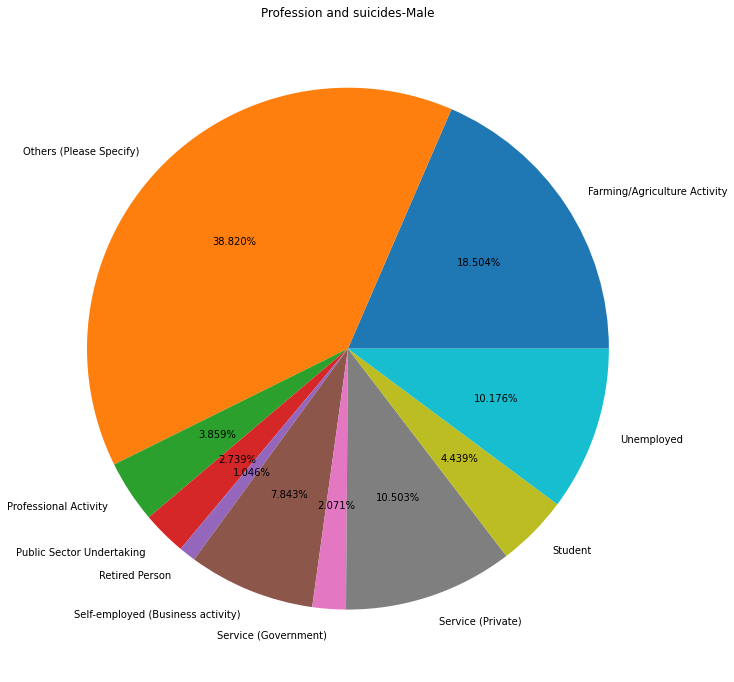

<Figure size 432x288 with 0 Axes>

In [613]:
plt.figure(figsize=(15,12))
plt.pie(Profession_male.Total,labels=Profession_male.Type,autopct='%1.3f%%')
plt.title("Profession and suicides-Male")
plt.show()
plt.savefig('profmen')

In [614]:
Profession_female = profession[profession['Gender']=='Female']
Profession_female = Profession_female.groupby('Type')['Total'].sum().reset_index()
Profession_female

,Type,Total
0,Farming/Agriculture Activity,27300
1,House Wife,285243
2,Others (Please Specify),111191
3,Professional Activity,3617
4,Public Sector Undertaking,5530
5,Retired Person,1680
6,Self-employed (Business activity),5789
7,Service (Government),4231
8,Service (Private),18622
9,Student,33392


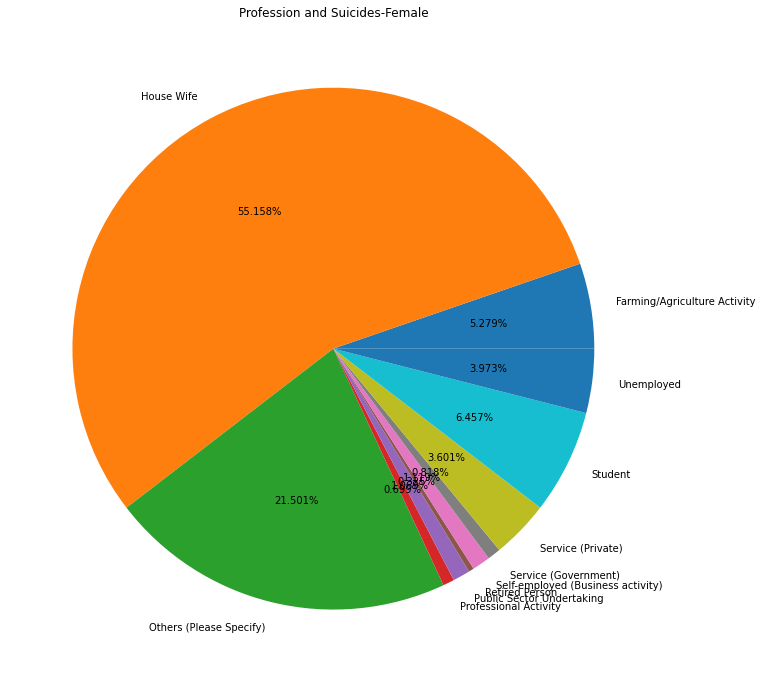

<Figure size 432x288 with 0 Axes>

In [615]:
plt.figure(figsize=(15,12))
plt.pie(Profession_female.Total,labels=Profession_female.Type,autopct='%1.3f%%')
plt.title("Profession and Suicides-Female")
plt.show()
plt.savefig('proffemale')

The top five categories of overall suicide are
*    house wives

*   Farmers

*   Service(private)

*   unemployed
*   Self employed

The top five categories of male suicides are


*   Farmers


*   Servive(private)


*   Unemployed


*   Self employed
*   Professional activity

The top five categories for female suicide are

*   House wives

*   Students

*   Farmers
*   Unemployed 

*   Service

The females are having higher student suicide rate than the male out of total male and female suicide rate.





**10. Profession by age group and the total suicide rate**

In [616]:
Profession_agegroup =profession.groupby(['Type','Age_group'])['Total'].sum()
Profession_agegroup

Type                               Age_group
Farming/Agriculture Activity       0-14           1041
                                   15-29         52700
                                   30-44         73634
                                   45-59         50166
                                   60+           20382
House Wife                         0-14            569
                                   15-29        127415
                                   30-44         96636
                                   45-59         43579
                                   60+           17044
Others (Please Specify)            0-14          14666
                                   15-29        140873
                                   30-44        157915
                                   45-59        106210
                                   60+           49483
Professional Activity              0-14            156
                                   15-29         11074
                    

From the above data it is shown that almost all the professions the highest 
suicide rate lies under the age group 30-44. Except for house wives, retired person, students and unemployed category.


*   For house wives the higher suicide rate comes under the age_group 15_29,
    (it may be starting time after marriage)
*   For retired person higher suicide rate is under the age group 60+ which is obvious, since most of the comes under those category
*   For Students the higher suicide rate is between 15-29
*   For unemployed individuals also higher suicide rate is between 15-29








**11. Marital Status and the total suicide rate**

In [617]:
social_backgroud = maritalstatus.groupby('Type')['Total'].sum().reset_index()
social_backgroud

,Type,Total
0,Divorcee,15272
1,Married,1021774
2,Never Married,318301
3,Seperated,38471
4,Widowed/Widower,62113


In [618]:
social_male = maritalstatus[maritalstatus['Gender']=='Male']
social_male = social_male.groupby('Type')['Total'].sum().reset_index()
social_male

,Type,Total
0,Divorcee,7580
1,Married,665007
2,Never Married,202841
3,Seperated,24306
4,Widowed/Widower,32184


In [619]:
social_female = maritalstatus[maritalstatus['Gender']=='Female']
social_female = social_female.groupby('Type')['Total'].sum().reset_index()
social_female

,Type,Total
0,Divorcee,7692
1,Married,356767
2,Never Married,115460
3,Seperated,14165
4,Widowed/Widower,29929


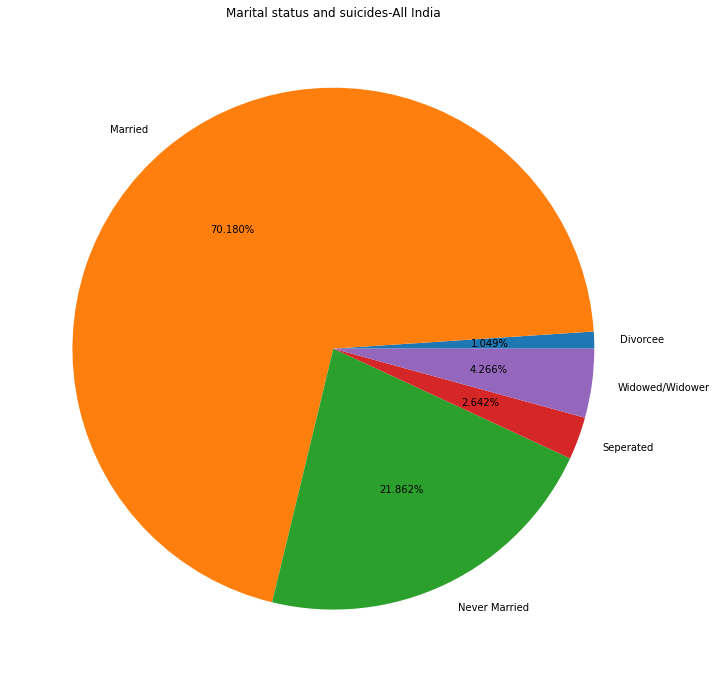

<Figure size 432x288 with 0 Axes>

In [620]:
plt.figure(figsize=(15,12))
plt.pie(social_backgroud.Total,labels=social_backgroud.Type,autopct='%1.3f%%')
plt.title("Marital status and suicides-All India")
plt.show()
plt.savefig('maritalindia')

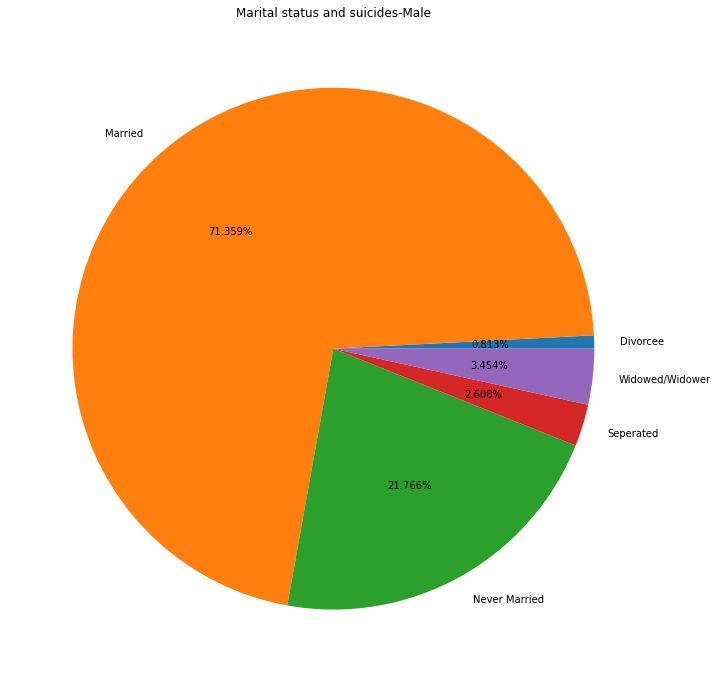

<Figure size 432x288 with 0 Axes>

In [621]:
plt.figure(figsize=(15,12))
plt.pie(social_male.Total,labels=social_backgroud.Type,autopct='%1.3f%%')
plt.title("Marital status and suicides-Male")
plt.show()
plt.savefig('maritalmalemale')

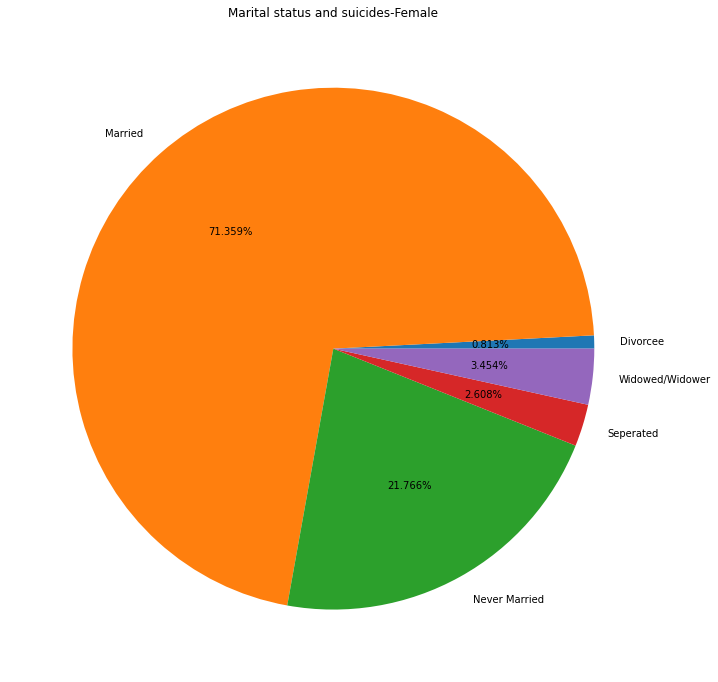

<Figure size 432x288 with 0 Axes>

In [622]:
plt.figure(figsize=(15,12))
plt.pie(social_male.Total,labels=social_backgroud.Type,autopct='%1.3f%%')
plt.title("Marital status and suicides-Female")
plt.show()
plt.savefig('maritalfemale')

Marital Status of the Suicide persons are almost same for total and gender wise. Most belongs to married catehory and least belongs to divorcee category.

**12. Statewise Suicide rate based on different marital Status**

In [623]:
social_stats = maritalstatus.groupby(['Type','State'])['Total'].sum().reset_index()
social_bydivorse = social_stats[social_stats['Type']=='Divorcee']
social_bydivorse = social_bydivorse.sort_values('Total',ascending=False).reset_index() 
social_Married = social_stats[social_stats['Type']=='Married']
social_Married = social_Married.sort_values('Total',ascending=False).reset_index() 
social_NeverMarried = social_stats[social_stats['Type']=='Never Married']
social_NeverMarried = social_NeverMarried.sort_values('Total',ascending=False).reset_index() 
social_Seperated = social_stats[social_stats['Type']=='Seperated']
social_Seperated = social_Seperated.sort_values('Total',ascending=False).reset_index() 
social_Widowed = social_stats[social_stats['Type']=='Widowed/Widower']
social_Widowed = social_Widowed.sort_values('Total',ascending=False).reset_index() 

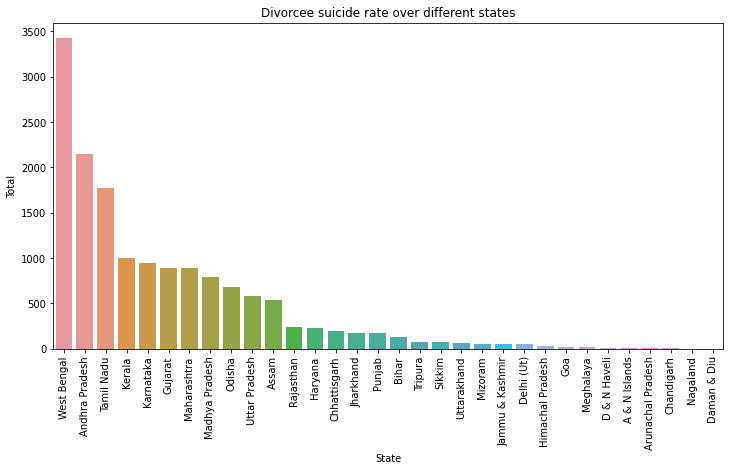

In [624]:
plt.figure(figsize=(12,6))
sns.barplot(x='State', y='Total', data=social_bydivorse).set(title='Divorcee suicide rate over different states')
plt.xticks(rotation=90)
plt.savefig('divorcestate')



*   The state having higher divorcee suicide rate is West Bengal
*   The top 5 states having higher divorcee rate are West Bengal, Andhra Pradhesh, Tamil Nadu, Kerala and Karnataka.

*   Even though Maharashtra is having higher overall suicide rate, it is in the 7th place for divorcee suicide rate





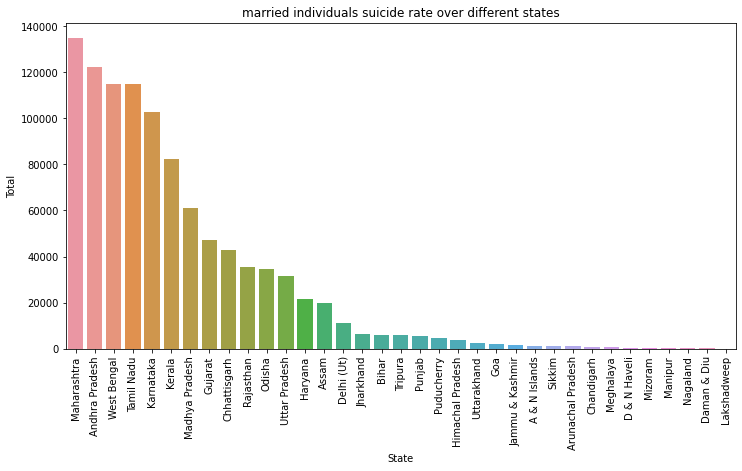

In [625]:
plt.figure(figsize=(12,6))
sns.barplot(x='State', y='Total', data=social_Married).set(title='married individuals suicide rate over different states')
plt.xticks(rotation=90)
plt.savefig('mariedstates')



*   In case of Suicide rate for married persons, again Maharashtra is in the top position

The top five states are

*   Maharashtra

*   Andhra Pradesh
*   West Bengal


*   Tamil Nadu


*   Karnataka



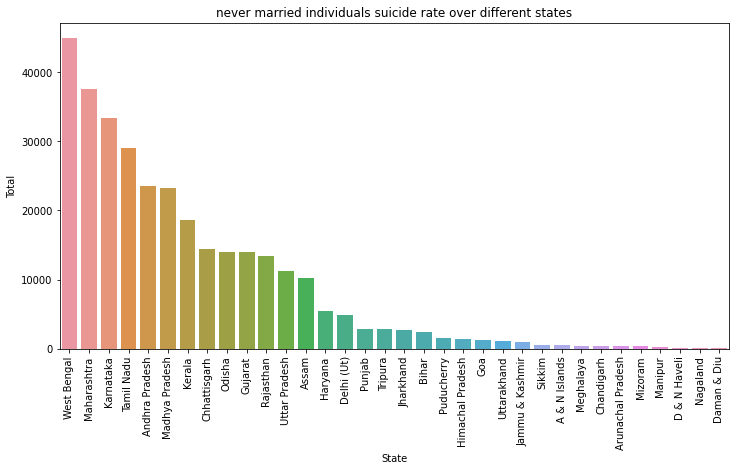

In [626]:
plt.figure(figsize=(12,6))
sns.barplot(x='State', y='Total', data=social_NeverMarried).set(title='never married individuals suicide rate over different states')
plt.xticks(rotation=90)
plt.savefig('nevermarstates')



*   In case of suicide rate for never married individuals West Bengal is in the top position

*   The top five states are West Bengal, Maharashtra, Karnataka, Tamil Nadu and Andhra Pradesh




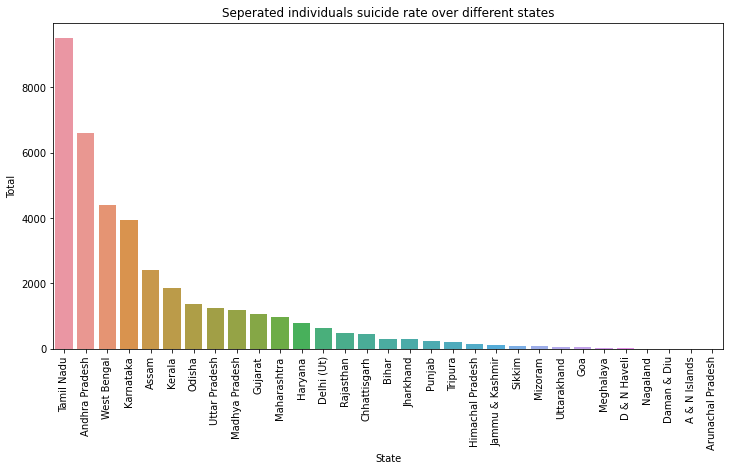

In [627]:
plt.figure(figsize=(12,6))
sns.barplot(x='State', y='Total', data=social_Seperated).set(title='Seperated individuals suicide rate over different states')
plt.xticks(rotation=90)
plt.savefig('sepstates')



*   In case of suicide rate for seperated individuals Tamil Nadu is in the Top position

*   Top five states are Tamil Nadu, Andhra Pradesh, West Bengal, Karnataka and Assam



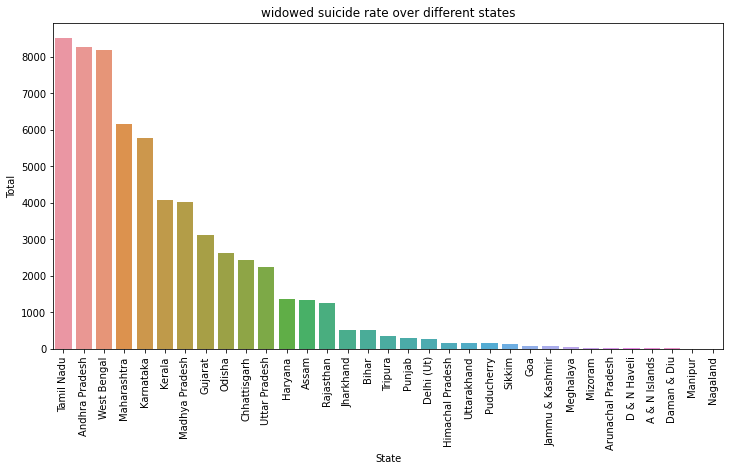

In [628]:
plt.figure(figsize=(12,6))
sns.barplot(x='State', y='Total', data=social_Widowed).set(title='widowed suicide rate over different states')
plt.xticks(rotation=90)
plt.savefig('widstates')



*   In case of Suicide rate of widowed individuals Tamil Nadu is in the top position.
*   The top five states are Tamil Nadu, Andhra Pradesh, West Bengal, Maharashtra and Karnataka 



**13. Analysing some of the suicide reason which belongs to top ten(known) and I felt worst reason and should be rectified with proper councelling both state wise and age group wise**

a) Analysing State wise and age wise suicide rate for the cause Dowry dispute

In [629]:
dowry = reasons_set[reasons_set['Type']== 'Dowry Dispute']
dowry_state = dowry.groupby('State')['Total'].sum().reset_index() 
dowry_state = dowry_state.sort_values('Total',ascending=False).reset_index() 
dowry_ages = dowry.groupby('Age_group')['Total'].sum().reset_index() 
dowry_state

,index,State,Total
0,14,Madhya Pradesh,7368
1,24,West Bengal,6401
2,22,Uttar Pradesh,4606
3,15,Maharashtra,3391
4,0,Andhra Pradesh,2769
5,20,Tamil Nadu,1234
6,16,Odisha,1206
7,12,Karnataka,712
8,4,Chhattisgarh,649
9,19,Rajasthan,615


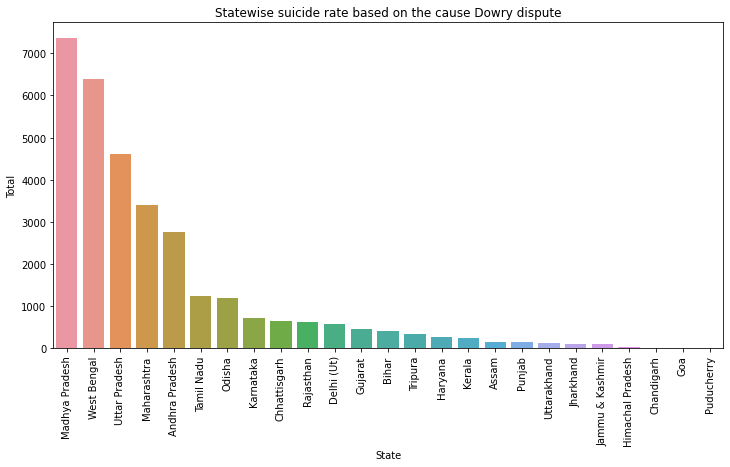

In [630]:
plt.figure(figsize=(12,6))
sns.barplot(x='State', y='Total', data=dowry_state).set(title='Statewise suicide rate based on the cause Dowry dispute')
plt.xticks(rotation=90)
plt.savefig('dowrystates')



*   Madhya Pradesh is having high suicide rate based on dowry dispute
*   Top five states are Madhya Pradesh, West Bengal, Uttar Pradesh, Maharashtra and Andhra Pradesh



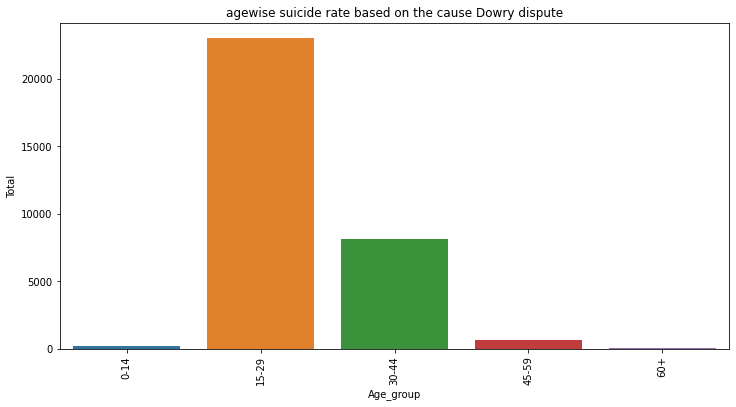

In [631]:
plt.figure(figsize=(12,6))
sns.barplot(x='Age_group', y='Total', data=dowry_ages).set(title='agewise suicide rate based on the cause Dowry dispute')
plt.xticks(rotation=90)
plt.savefig('dowryagewise')

individuals who are suiciding due to dowry problems are mainly between the age group 15-29 and secondly 30-44

b) statewise and age wise suicide rate analysis for the reason examination failur

In [632]:
exam_failure = reasons_set[reasons_set['Type']== 'Failure in Examination']
ef_state = exam_failure.groupby('State')['Total'].sum().reset_index()
ef_state = ef_state.sort_values('Total',ascending=False).reset_index() 
ef_ages = exam_failure.groupby('Age_group')['Total'].sum().reset_index()

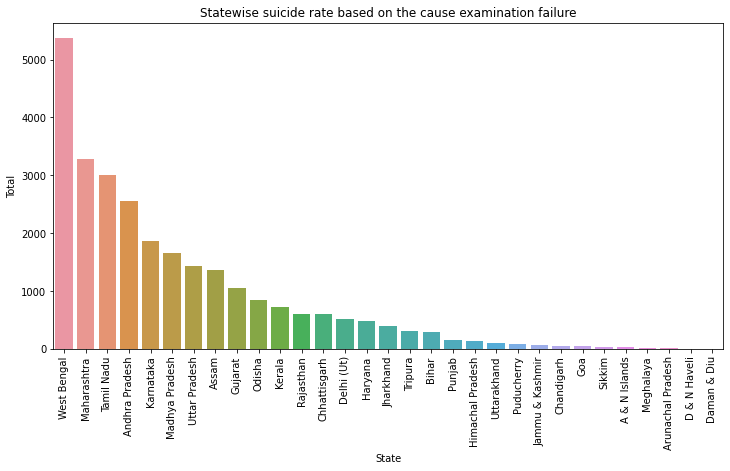

In [633]:
plt.figure(figsize=(12,6))
sns.barplot(x='State', y='Total', data=ef_state).set(title='Statewise suicide rate based on the cause examination failure')
plt.xticks(rotation=90)
plt.savefig('examstate')



*   West Bengal is havinh high rate of suicide due to examination failure
*   The top five states are West Bengal, Maharashtra, Tamil Nadu, Andhra Pradesh and Karnataka



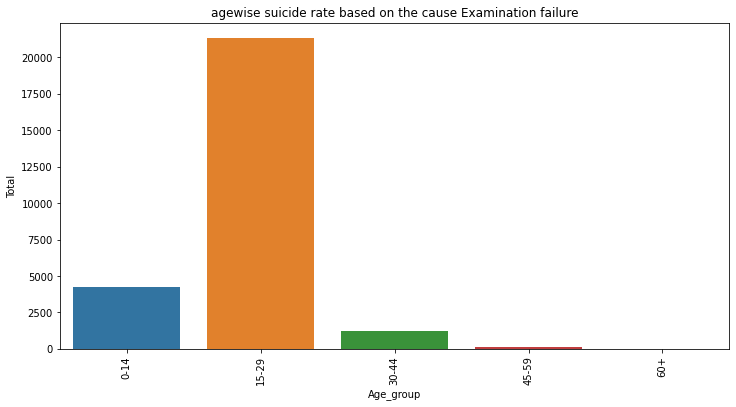

In [634]:
plt.figure(figsize=(12,6))
sns.barplot(x='Age_group', y='Total', data=ef_ages).set(title='agewise suicide rate based on the cause Examination failure')
plt.xticks(rotation=90)
plt.savefig('examagewise')



*   The age group of individual committed suicide due to examination failure lie mainly between 15-29. Then 0-14




c) statewise and agewise suicite rate for the cause drug abuse

In [635]:
drugabuse = reasons_set[reasons_set['Type']== 'Drug Abuse/Addiction']
drug_state = drugabuse.groupby('State')['Total'].sum().reset_index()
drug_state = drug_state.sort_values('Total',ascending=False).reset_index() 
drug_ages = drugabuse.groupby('Age_group')['Total'].sum().reset_index()

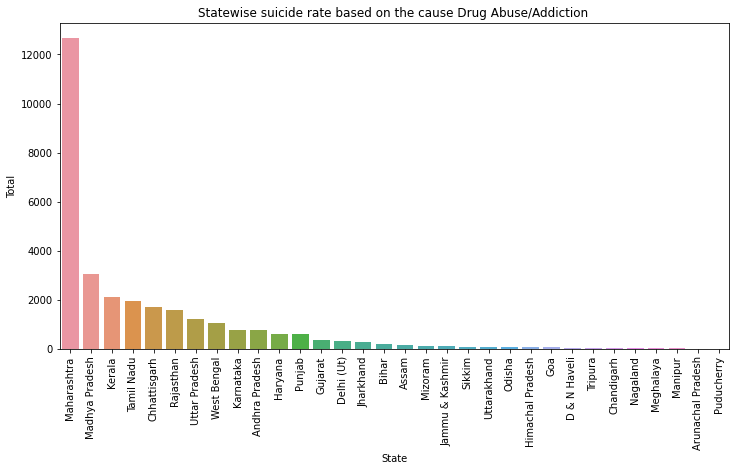

In [636]:
plt.figure(figsize=(12,6))
sns.barplot(x='State', y='Total', data=drug_state).set(title='Statewise suicide rate based on the cause Drug Abuse/Addiction ')
plt.xticks(rotation=90)
plt.savefig('drugstate')



*   Maharashtra is having high rate of suicides due to  drug abuse and addiction
*   The top five states are Maharashtra, Madhya Pradesh, Kerala, Tamil Nadu, Chattisgarh



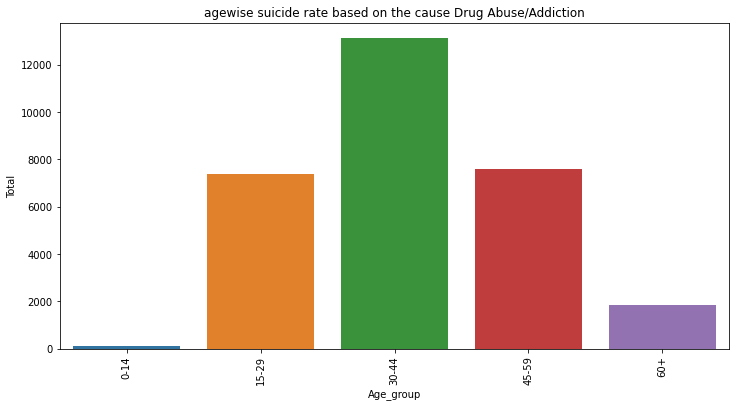

In [637]:
plt.figure(figsize=(12,6))
sns.barplot(x='Age_group', y='Total', data=drug_ages).set(title='agewise suicide rate based on the cause Drug Abuse/Addiction')
plt.xticks(rotation=90)
plt.savefig('drugage')

The individuals who commited suicides due to drug abuse or addict mainly comes under the age group 30-44, then 45-59 and 15-29 are almost equal. 

**14. Analysing whether the above three causes for suicide increase or decrease as increase in year**

a) Dowry

In [638]:
dowry = reasons_set[reasons_set['Type']== 'Dowry Dispute']
dowry_year = dowry.groupby('Year')['Total'].sum().reset_index() 
dowry_year = dowry_year.sort_values('Total',ascending=False).reset_index() 

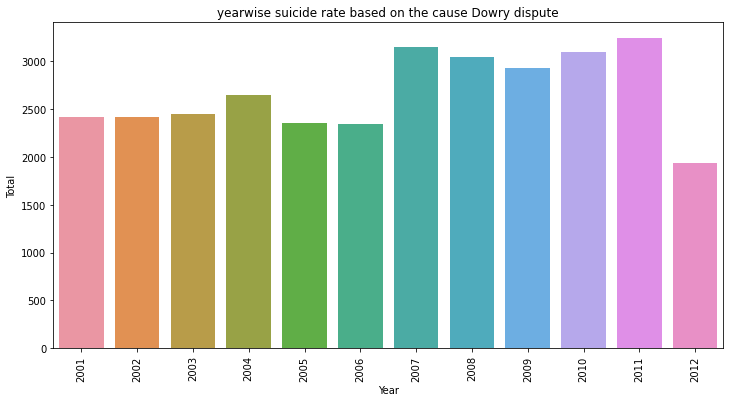

In [639]:
plt.figure(figsize=(12,6))
sns.barplot(x='Year', y='Total', data=dowry_year).set(title='yearwise suicide rate based on the cause Dowry dispute')
plt.xticks(rotation=90)
plt.savefig('dowryyear')

This trend cannot be predicted

b) Examination failure

In [640]:
Exam = reasons_set[reasons_set['Type']== 'Failure in Examination']
Exam_year = Exam.groupby('Year')['Total'].sum().reset_index() 
Exam_year = dowry_year.sort_values('Total',ascending=False).reset_index() 

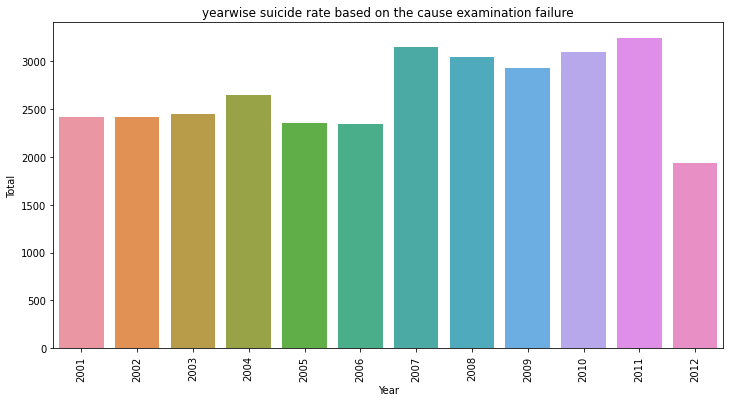

In [641]:
plt.figure(figsize=(12,6))
sns.barplot(x='Year', y='Total', data=Exam_year).set(title='yearwise suicide rate based on the cause examination failure')
plt.xticks(rotation=90)
plt.savefig('examyear')

Trend is varying.

c) drug abuse

In [642]:
drugabuse = reasons_set[reasons_set['Type']== 'Drug Abuse/Addiction']
drug_year = drugabuse.groupby('Year')['Total'].sum().reset_index()
drug_year = drug_year.sort_values('Total',ascending=False).reset_index() 

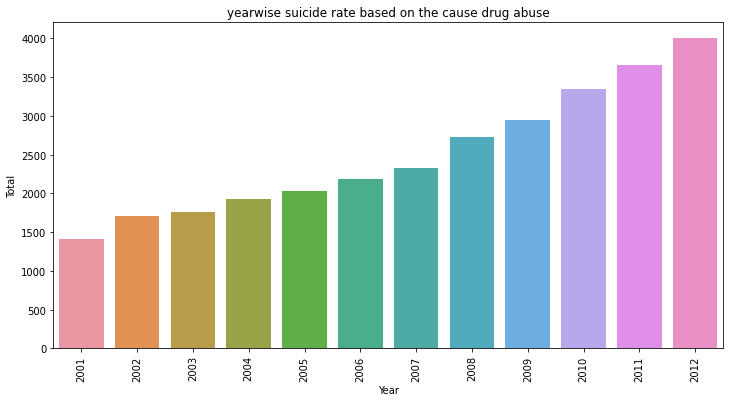

In [643]:
plt.figure(figsize=(12,6))
sns.barplot(x='Year', y='Total', data=drug_year).set(title='yearwise suicide rate based on the cause drug abuse')
plt.xticks(rotation=90)
plt.savefig('drugyear')

This is showing an increasing trend ie, as the year passes suicides committed due to drug addiction also increases.

15) The below analysis is done just due to my curiosity in knowing which place is having higher suicide rate due to Ideological Causes/Hero Worshipping and also analysing their age group and also to analyse the trend in yearwise suicide rate.

In [644]:
ideological = reasons_set[reasons_set['Type']== 'Ideological Causes/Hero Worshipping']
ideol_state = ideological.groupby('State')['Total'].sum().reset_index()
ideol_state = ideol_state.sort_values('Total',ascending=False).reset_index() 
ideol_ages = ideological.groupby('Age_group')['Total'].sum().reset_index()

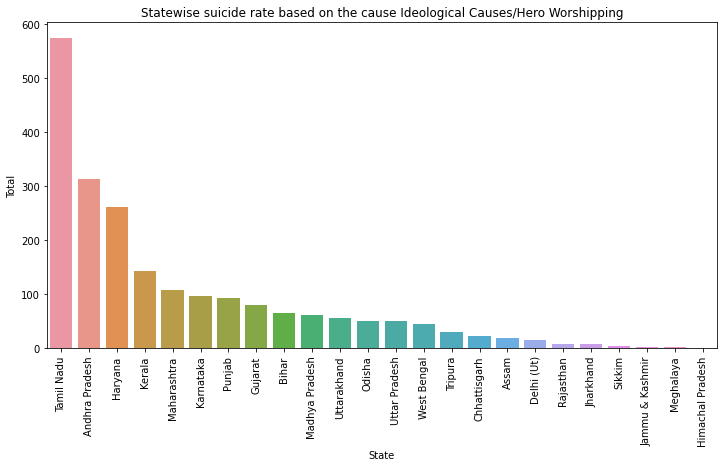

In [645]:
plt.figure(figsize=(12,6))
sns.barplot(x='State', y='Total', data=ideol_state).set(title='Statewise suicide rate based on the cause Ideological Causes/Hero Worshipping')
plt.xticks(rotation=90)
plt.savefig('ideostate')

It is showing that higher suicide rate due to Ideological Causes/Hero Worshipping is in the place Tamil Nadu.

Top five places are Tamil Nadu, Andhra Pradesh, Haryana, Kerala and Maharashtra

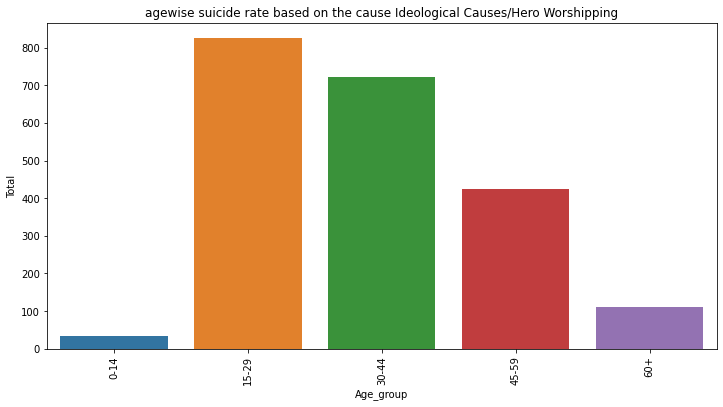

In [646]:
plt.figure(figsize=(12,6))
sns.barplot(x='Age_group', y='Total', data=ideol_ages).set(title='agewise suicide rate based on the cause Ideological Causes/Hero Worshipping')
plt.xticks(rotation=90)
plt.savefig('ideoage')

The individuals who commits suicide due to Ideological Causes/Hero Worshipping belongs to 15-29 age group, then 30-44. It is comparatecely lower in children and for senior citizens.

In [647]:
ideological = reasons_set[reasons_set['Type']== 'Ideological Causes/Hero Worshipping']
ideol_year = ideological.groupby('Year')['Total'].sum().reset_index()
ideol_year = ideol_year.sort_values('Total',ascending=False).reset_index() 

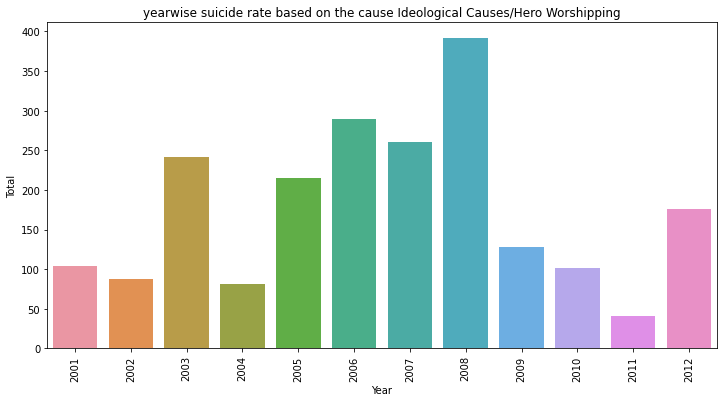

In [648]:
plt.figure(figsize=(12,6))
sns.barplot(x='Year', y='Total', data=ideol_year).set(title='yearwise suicide rate based on the cause Ideological Causes/Hero Worshipping')
plt.xticks(rotation=90)
plt.savefig('ideoyear')

The trend is varrying with the year